In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# **1. Train Events Analyse**

In [2]:
# Load csv
train_events = pd.read_csv("/kaggle/input/child-mind-institute-detect-sleep-states/train_events.csv")

In [3]:
train_events.head()

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400


* => Note that the timestamp is hard to read
* => Convert to day, hour, minute

In [4]:
train_events["timestamp"]=pd.to_datetime(train_events["timestamp"], utc=True)

In [5]:
train_events["year"]=train_events["timestamp"].dt.year
train_events["month"]=train_events["timestamp"].dt.month
train_events["day"]=train_events["timestamp"].dt.day
train_events["hour"]=train_events["timestamp"].dt.hour
train_events["minute"]=train_events["timestamp"].dt.minute

In [6]:
train_events.head()

,series_id,night,event,step,timestamp,year,month,day,hour,minute
0,038441c925bb,1,onset,4992.0,2018-08-15 02:26:00+00:00,2018.0,8.0,15.0,2.0,26.0
1,038441c925bb,1,wakeup,10932.0,2018-08-15 10:41:00+00:00,2018.0,8.0,15.0,10.0,41.0
2,038441c925bb,2,onset,20244.0,2018-08-15 23:37:00+00:00,2018.0,8.0,15.0,23.0,37.0
3,038441c925bb,2,wakeup,27492.0,2018-08-16 09:41:00+00:00,2018.0,8.0,16.0,9.0,41.0
4,038441c925bb,3,onset,39996.0,2018-08-17 03:03:00+00:00,2018.0,8.0,17.0,3.0,3.0


In [7]:
train_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14508 entries, 0 to 14507
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   series_id  14508 non-null  object             
 1   night      14508 non-null  int64              
 2   event      14508 non-null  object             
 3   step       9585 non-null   float64            
 4   timestamp  9585 non-null   datetime64[ns, UTC]
 5   year       9585 non-null   float64            
 6   month      9585 non-null   float64            
 7   day        9585 non-null   float64            
 8   hour       9585 non-null   float64            
 9   minute     9585 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1), object(2)
memory usage: 1.1+ MB


In [8]:
train_events.describe(include="all")

,series_id,night,event,step,timestamp,year,month,day,hour,minute
count,14508,14508.000000,14508,9585.000000,9585,9585.000000,9585.000000,9585.000000,9585.000000,9585.000000
unique,277,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,78569a801a38,NaN,onset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,168,NaN,7254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,15.120072,NaN,214352.123944,2018-07-01 09:56:50.948356864+00:00,2017.998435,6.501304,16.006886,7.182473,28.736463
min,NaN,1.000000,NaN,936.000000,2017-08-06 02:44:00+00:00,2017.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,7.000000,NaN,95436.000000,2018-01-26 03:09:00+00:00,2018.000000,3.000000,8.000000,2.000000,14.000000
50%,NaN,14.000000,NaN,200604.000000,2018-06-17 03:05:00+00:00,2018.000000,6.000000,16.000000,9.000000,29.000000
75%,NaN,21.000000,NaN,317520.000000,2018-12-17 11:36:00+00:00,2018.000000,10.000000,24.000000,11.000000,44.000000
max,NaN,84.000000,NaN,739392.000000,2019-07-05 09:33:00+00:00,2019.000000,12.000000,31.000000,23.000000,59.000000


## Analyse

## series_id 
* 14508 records
* 277 unique series_id
* series_id is used the most = 78569a801a38 with 168 

## night
* 14508 records
* mean is 15
* range from 1 to 84
* median is 14

## step
* don't have unique step => cannot use it to predict? how about a range?

## time
* from 2017 to 2019
* how to fix utc?

In [9]:
import missingno as msno

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

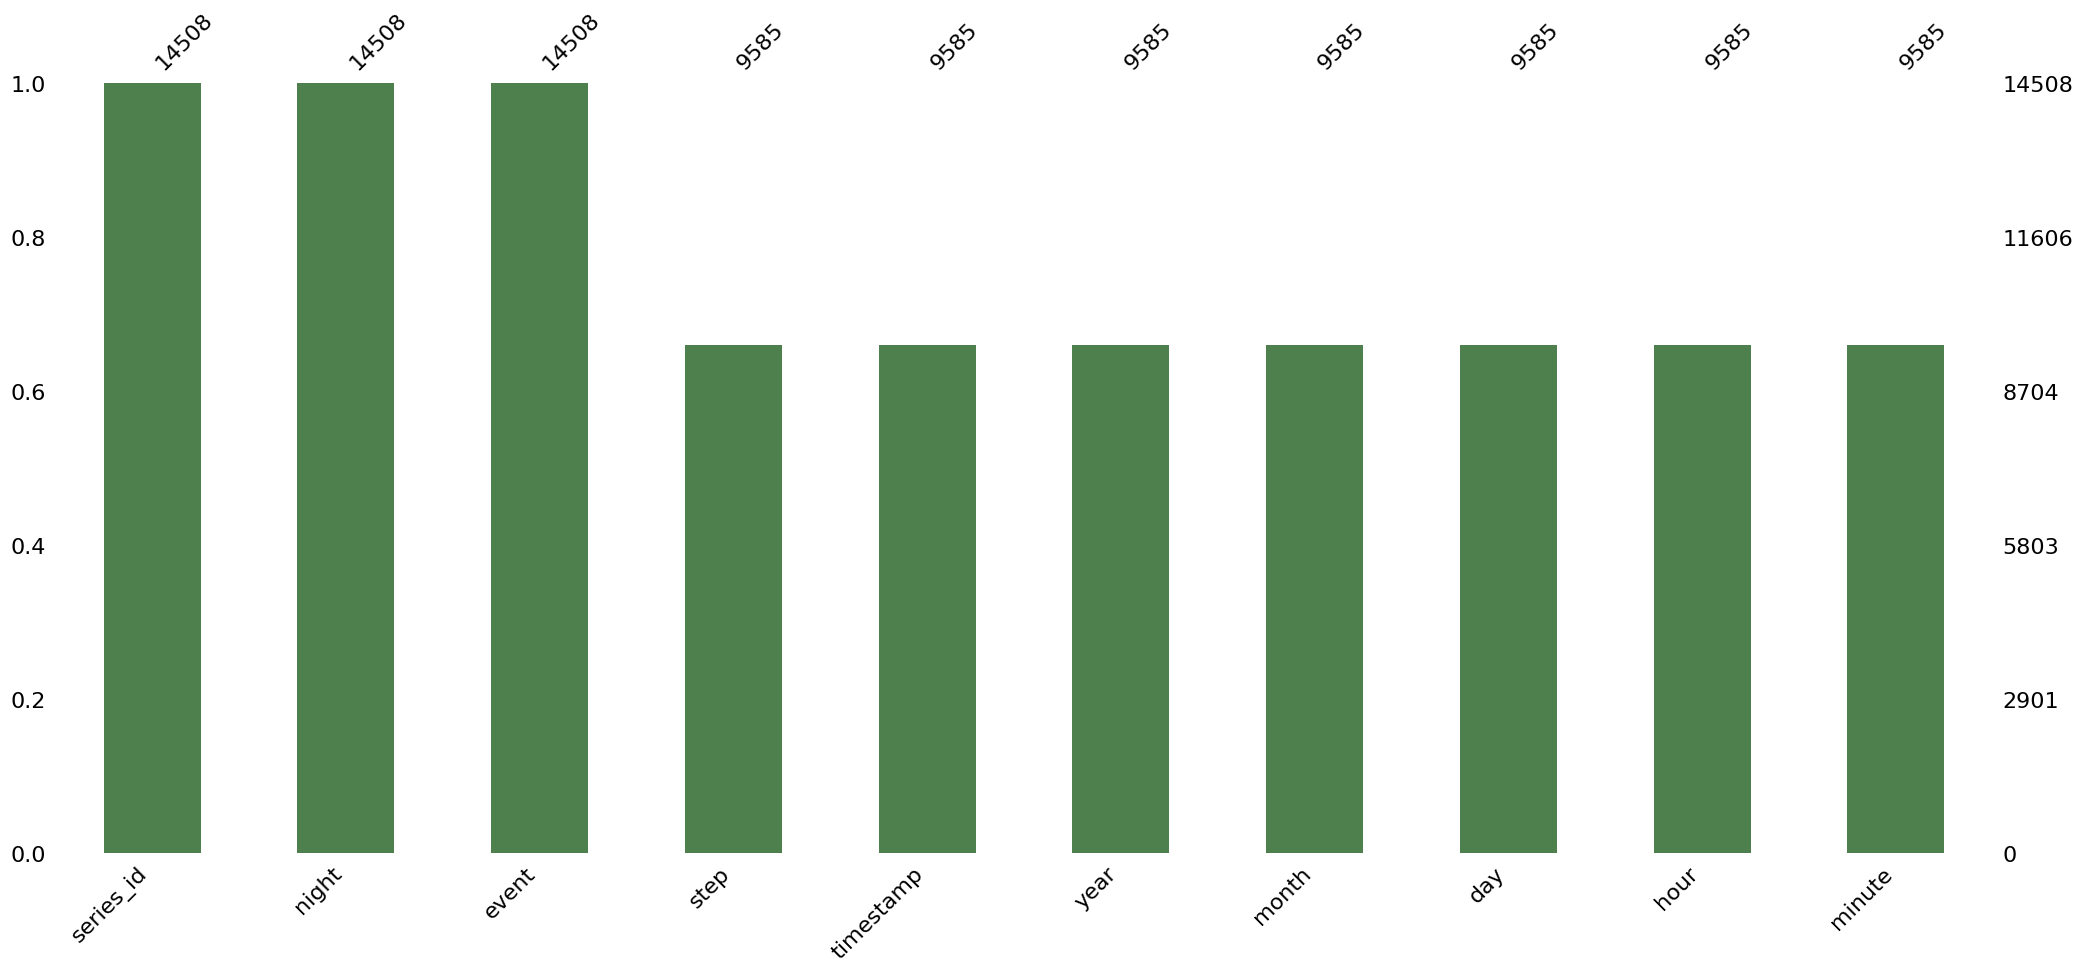

In [10]:
msno.bar(train_events, color=(0.3,0.5,0.3))

## Number of Missing data

In [11]:
print(train_events["step"].isna().sum())

4923


## Missing data is ~ 33% 
* the missing data is scatter 
* each id has a series of data => each series may has missing record 

## Example how data is missing

In [12]:
print(train_events[train_events["step"].isnull()])

          series_id  night   event  step timestamp  year  month  day  hour  \
8      038441c925bb      5   onset   NaN       NaT   NaN    NaN  NaN   NaN   
9      038441c925bb      5  wakeup   NaN       NaT   NaN    NaN  NaN   NaN   
16     038441c925bb      9   onset   NaN       NaT   NaN    NaN  NaN   NaN   
17     038441c925bb      9  wakeup   NaN       NaT   NaN    NaN  NaN   NaN   
26     038441c925bb     14   onset   NaN       NaT   NaN    NaN  NaN   NaN   
...             ...    ...     ...   ...       ...   ...    ...  ...   ...   
14437  fcca183903b7     36  wakeup   NaN       NaT   NaN    NaN  NaN   NaN   
14438  fe90110788d2      1   onset   NaN       NaT   NaN    NaN  NaN   NaN   
14439  fe90110788d2      1  wakeup   NaN       NaT   NaN    NaN  NaN   NaN   
14506  fe90110788d2     35   onset   NaN       NaT   NaN    NaN  NaN   NaN   
14507  fe90110788d2     35  wakeup   NaN       NaT   NaN    NaN  NaN   NaN   

       minute  
8         NaN  
9         NaN  
16        NaN  

<Axes: >

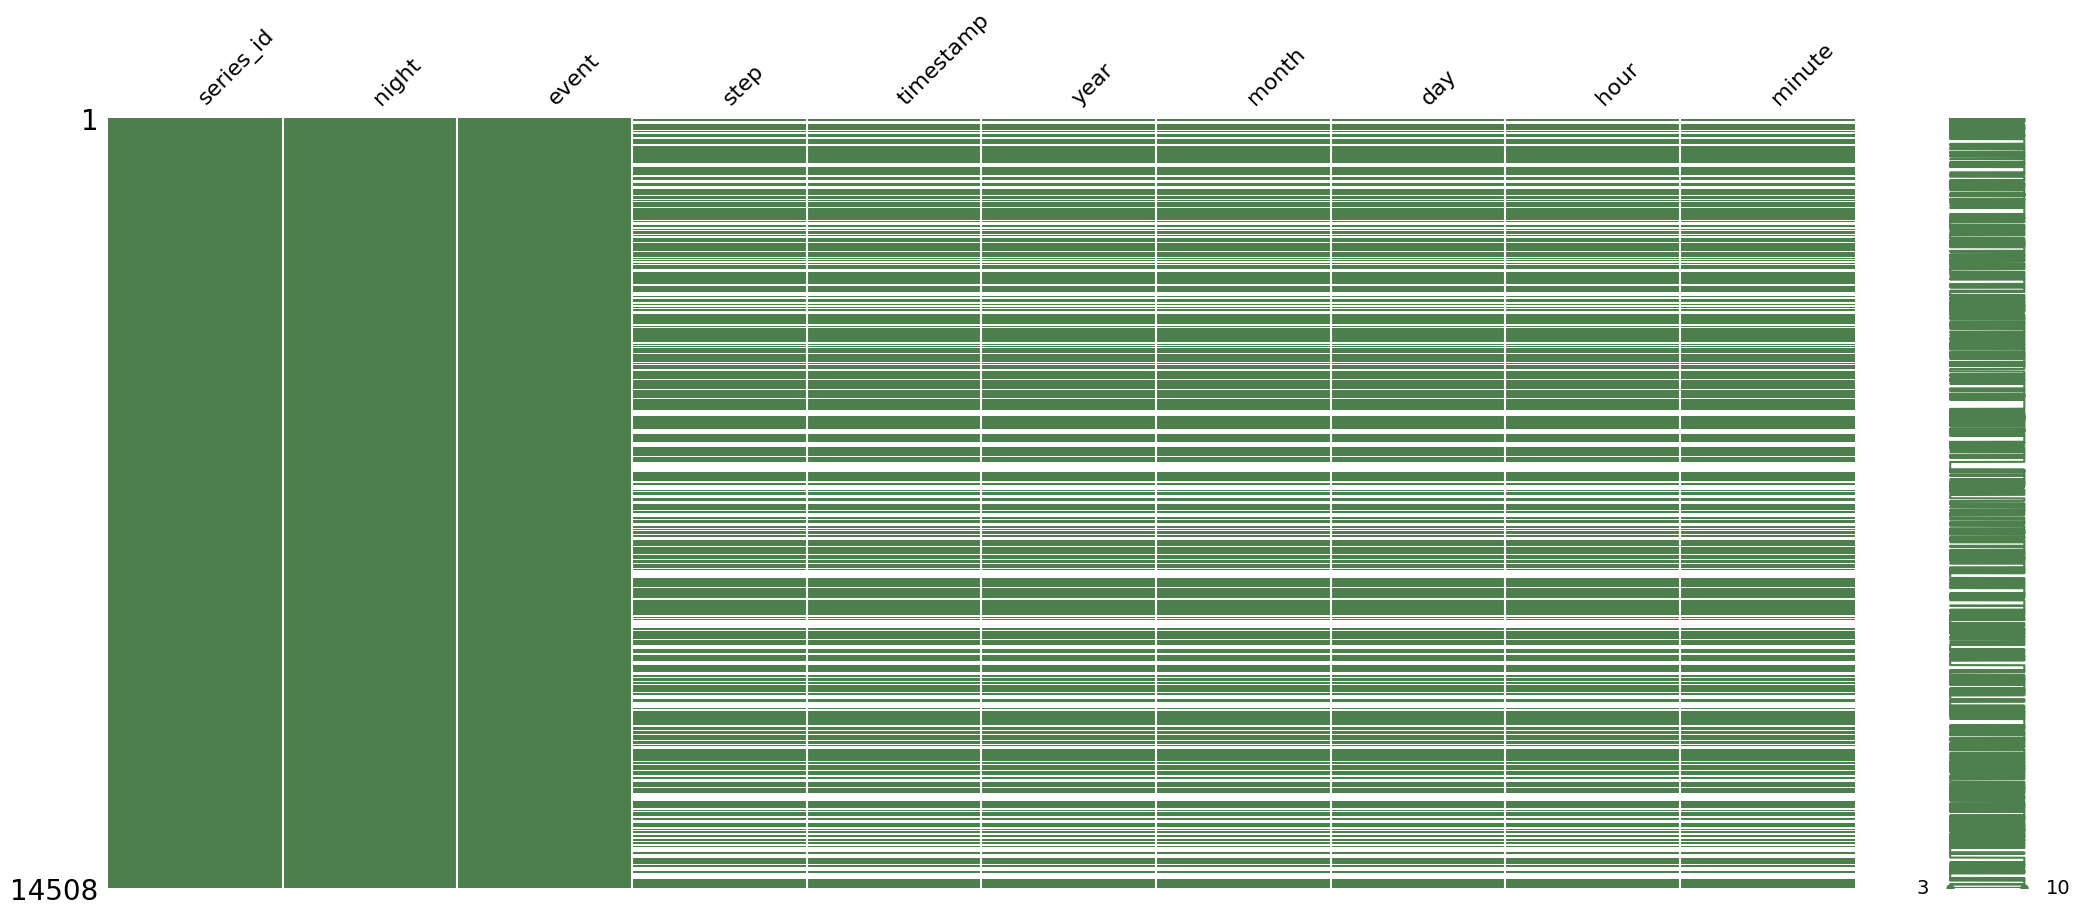

In [13]:
msno.matrix(train_events, color=(0.3,0.5,0.3))

In [14]:
train_events.groupby('series_id').size()

series_id
038441c925bb     46
03d92c9f6f8a     74
0402a003dae9     48
04f547b8017d     74
05e1944c3818     16
               ... 
fa149c3c4bde     48
fb223ed2278c    106
fbf33b1a2c10     48
fcca183903b7     72
fe90110788d2     70
Length: 277, dtype: int64

In [15]:
nb_missing = train_events.groupby('series_id')['step'].apply(lambda x: x.isnull().any())
nb_missing

series_id
038441c925bb    True
03d92c9f6f8a    True
0402a003dae9    True
04f547b8017d    True
05e1944c3818    True
                ... 
fa149c3c4bde    True
fb223ed2278c    True
fbf33b1a2c10    True
fcca183903b7    True
fe90110788d2    True
Name: step, Length: 277, dtype: bool

In [16]:
nb_missing.value_counts()

step
True     240
False     37
Name: count, dtype: int64

In [17]:
no_missing = nb_missing[~nb_missing].index.to_list()
no_missing

['08db4255286f',
 '0a96f4993bd7',
 '0cfc06c129cc',
 '1087d7b0ff2e',
 '10f8bc1f7b07',
 '18b61dd5aae8',
 '29c75c018220',
 '31011ade7c0a',
 '3452b878e596',
 '349c5562ee2c',
 '3664fe9233f9',
 '483d6545417f',
 '55a47ff9dc8a',
 '5acc9d63b5fd',
 '5f94bb3e1bed',
 '655f19eabf1e',
 '67f5fc60e494',
 '72bbd1ac3edf',
 '76237b9406d5',
 '7822ee8fe3ec',
 '89bd631d1769',
 '8e32047cbc1f',
 '939932f1822d',
 '9ee455e4770d',
 'a596ad0b82aa',
 'a9a2f7fac455',
 'a9e5f5314bcb',
 'af91d9a50547',
 'b364205aba43',
 'c535634d7dcd',
 'c6788e579967',
 'c68260cc9e8f',
 'ca730dbf521d',
 'd150801f3145',
 'd25e479ecbb7',
 'd515236bdeec',
 'd5e47b94477e']

## Density of night

In [18]:
nb_nights = train_events.groupby('series_id')['night'].max()
nb_nights

series_id
038441c925bb    23
03d92c9f6f8a    37
0402a003dae9    24
04f547b8017d    37
05e1944c3818     8
                ..
fa149c3c4bde    24
fb223ed2278c    53
fbf33b1a2c10    24
fcca183903b7    36
fe90110788d2    35
Name: night, Length: 277, dtype: int64

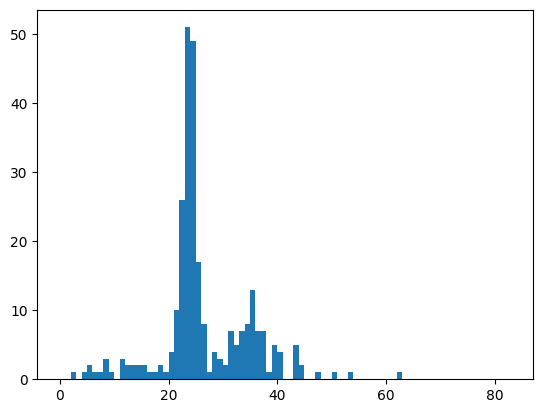

In [19]:
plt.hist(x=nb_nights, bins = [t for t in range(84)])
plt.show()

In [20]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Density of data by hour

In [21]:
onset_df=train_events[train_events["event"]=="onset"]
wakeup_df=train_events[train_events["event"]=="wakeup"]

fig = make_subplots(rows=1, cols=2,  subplot_titles=("Onset", "Wakeup"))
fig.add_trace(go.Histogram(x=onset_df["hour"].dropna(), nbinsx=24), row=1, col=1)
fig.add_trace(go.Histogram(x=wakeup_df["hour"].dropna(), nbinsx=24), row=1, col=2)
fig.show()

* 0h->10h (0h->15h) = onset
* 8h->16h (4h->19h) = wakeup

In [22]:
train_events_nonull = train_events.dropna(axis=0)
train_events_nonull.value_counts()

series_id     night  event   step      timestamp                  year    month  day   hour  minute
038441c925bb  1      onset   4992.0    2018-08-15 02:26:00+00:00  2018.0  8.0    15.0  2.0   26.0      1
b4b75225b224  2      onset   23172.0   2018-03-08 00:56:00+00:00  2018.0  3.0    8.0   0.0   56.0      1
              3      onset   40536.0   2018-03-09 01:03:00+00:00  2018.0  3.0    9.0   1.0   3.0       1
                     wakeup  47880.0   2018-03-09 11:15:00+00:00  2018.0  3.0    9.0   11.0  15.0      1
              4      onset   57732.0   2018-03-10 00:56:00+00:00  2018.0  3.0    10.0  0.0   56.0      1
                                                                                                      ..
55a47ff9dc8a  16     onset   268416.0  2018-03-03 06:48:00+00:00  2018.0  3.0    3.0   6.0   48.0      1
                     wakeup  272184.0  2018-03-03 12:02:00+00:00  2018.0  3.0    3.0   12.0  2.0       1
              17     onset   282036.0  2018-03-04 01:43:00+0

In [23]:
sleep_duration = train_events_nonull.groupby([train_events_nonull['series_id'], train_events_nonull['night']])['timestamp'].agg(['min', 'max'])
sleep_duration

min                       max
series_id    night                                                    
038441c925bb 1     2018-08-15 02:26:00+00:00 2018-08-15 10:41:00+00:00
             2     2018-08-15 23:37:00+00:00 2018-08-16 09:41:00+00:00
             3     2018-08-17 03:03:00+00:00 2018-08-17 09:10:00+00:00
             4     2018-08-18 03:00:00+00:00 2018-08-18 10:48:00+00:00
             6     2018-08-20 02:18:00+00:00 2018-08-20 11:25:00+00:00
...                                      ...                       ...
fe90110788d2 30    2017-09-03 03:03:00+00:00 2017-09-03 11:37:00+00:00
             31    2017-09-04 03:41:00+00:00 2017-09-04 12:22:00+00:00
             32    2017-09-05 02:03:00+00:00 2017-09-05 13:26:00+00:00
             33    2017-09-06 02:30:00+00:00 2017-09-06 08:07:00+00:00
             34    2017-09-07 03:35:00+00:00 2017-09-07 13:17:00+00:00

[4795 rows x 2 columns]

In [24]:
sleep_duration['duration'] = ((sleep_duration['max'] - sleep_duration['min']).dt.seconds/3600)
sleep_duration

min                       max  \
series_id    night                                                       
038441c925bb 1     2018-08-15 02:26:00+00:00 2018-08-15 10:41:00+00:00   
             2     2018-08-15 23:37:00+00:00 2018-08-16 09:41:00+00:00   
             3     2018-08-17 03:03:00+00:00 2018-08-17 09:10:00+00:00   
             4     2018-08-18 03:00:00+00:00 2018-08-18 10:48:00+00:00   
             6     2018-08-20 02:18:00+00:00 2018-08-20 11:25:00+00:00   
...                                      ...                       ...   
fe90110788d2 30    2017-09-03 03:03:00+00:00 2017-09-03 11:37:00+00:00   
             31    2017-09-04 03:41:00+00:00 2017-09-04 12:22:00+00:00   
             32    2017-09-05 02:03:00+00:00 2017-09-05 13:26:00+00:00   
             33    2017-09-06 02:30:00+00:00 2017-09-06 08:07:00+00:00   
             34    2017-09-07 03:35:00+00:00 2017-09-07 13:17:00+00:00   

                     duration  
series_id    night             
038441c925bb 1       8.250000  
             2      10.066667  
             3       6.116667  
             4       7.800000  
             6       9.116667  
...                       ...  
fe90110788d2 30      8.566667  
             31      8.683333  
             32     11.383333  
             33      5.616667  
             34      9.700000  

[4795 rows x 3 columns]

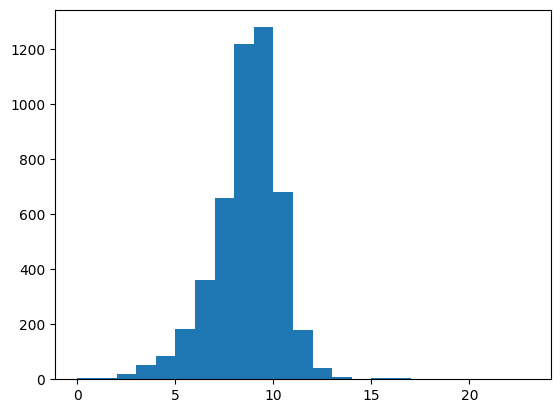

In [25]:
plt.hist(x=sleep_duration['duration'], bins=[t for t in range(24)])
plt.show()

In [26]:
import plotly.express as px

## Step size in each Series

* Don't show the step between each step, because of missing value

In [27]:
step_duration = train_events.groupby('series_id')['step'].agg(['min','max'])
step_duration

,min,max
series_id,,
038441c925bb,4992.0,369912.0
03d92c9f6f8a,5928.0,255060.0
0402a003dae9,8364.0,376920.0
04f547b8017d,23484.0,446400.0
05e1944c3818,20520.0,131352.0
...,...,...
fa149c3c4bde,3012.0,406080.0
fb223ed2278c,7536.0,153564.0
fbf33b1a2c10,23412.0,409044.0


In [28]:
step_by_series = step_duration['max'] - step_duration['min']
step_by_series

series_id
038441c925bb    364920.0
03d92c9f6f8a    249132.0
0402a003dae9    368556.0
04f547b8017d    422916.0
05e1944c3818    110832.0
                  ...   
fa149c3c4bde    403068.0
fb223ed2278c    146028.0
fbf33b1a2c10    385632.0
fcca183903b7    595836.0
fe90110788d2    560556.0
Length: 277, dtype: float64

In [29]:
step_histo = px.histogram(step_by_series)
step_histo.show()

# **2. Train Series Analyse**

In [30]:
train_series = pd.read_parquet('/kaggle/input/child-mind-institute-detect-sleep-states/train_series.parquet')

In [31]:
train_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127946340 entries, 0 to 127946339
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   series_id  object 
 1   step       uint32 
 2   timestamp  object 
 3   anglez     float32
 4   enmo       float32
dtypes: float32(2), object(2), uint32(1)
memory usage: 3.3+ GB


In [32]:
train_series.head()

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.6367,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.6368,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.6370,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.6368,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.6368,0.0215


In [33]:
train_series.describe(include='all')

,series_id,step,timestamp,anglez,enmo
count,127946340,1.279463e+08,127946340,1.279463e+08,1.279463e+08
unique,277,NaN,12159540,NaN,NaN
top,78569a801a38,NaN,2018-12-27T10:03:30-0500,NaN,NaN
freq,1433880,NaN,19,NaN,NaN
mean,NaN,2.548048e+05,NaN,-8.810453e+00,4.131503e-02
std,NaN,1.778930e+05,NaN,3.552188e+01,1.018289e-01
min,NaN,0.000000e+00,NaN,-9.000000e+01,0.000000e+00
25%,NaN,1.158120e+05,NaN,-3.185890e+01,1.300000e-03
50%,NaN,2.345190e+05,NaN,-9.597900e+00,1.720000e-02
75%,NaN,3.571960e+05,NaN,1.130020e+01,4.370000e-02


## Series_id
* 277 unique series_id => no series has no data

## anglez
* anglez max: 90
* anglez min: -90
* anglez mean: -88
* anglez std: 35.5

## enmo
* enmo max: 11.4
* enmo min: 0
* enmo mean: 0.04
* enmo std: 0.1

<Axes: >

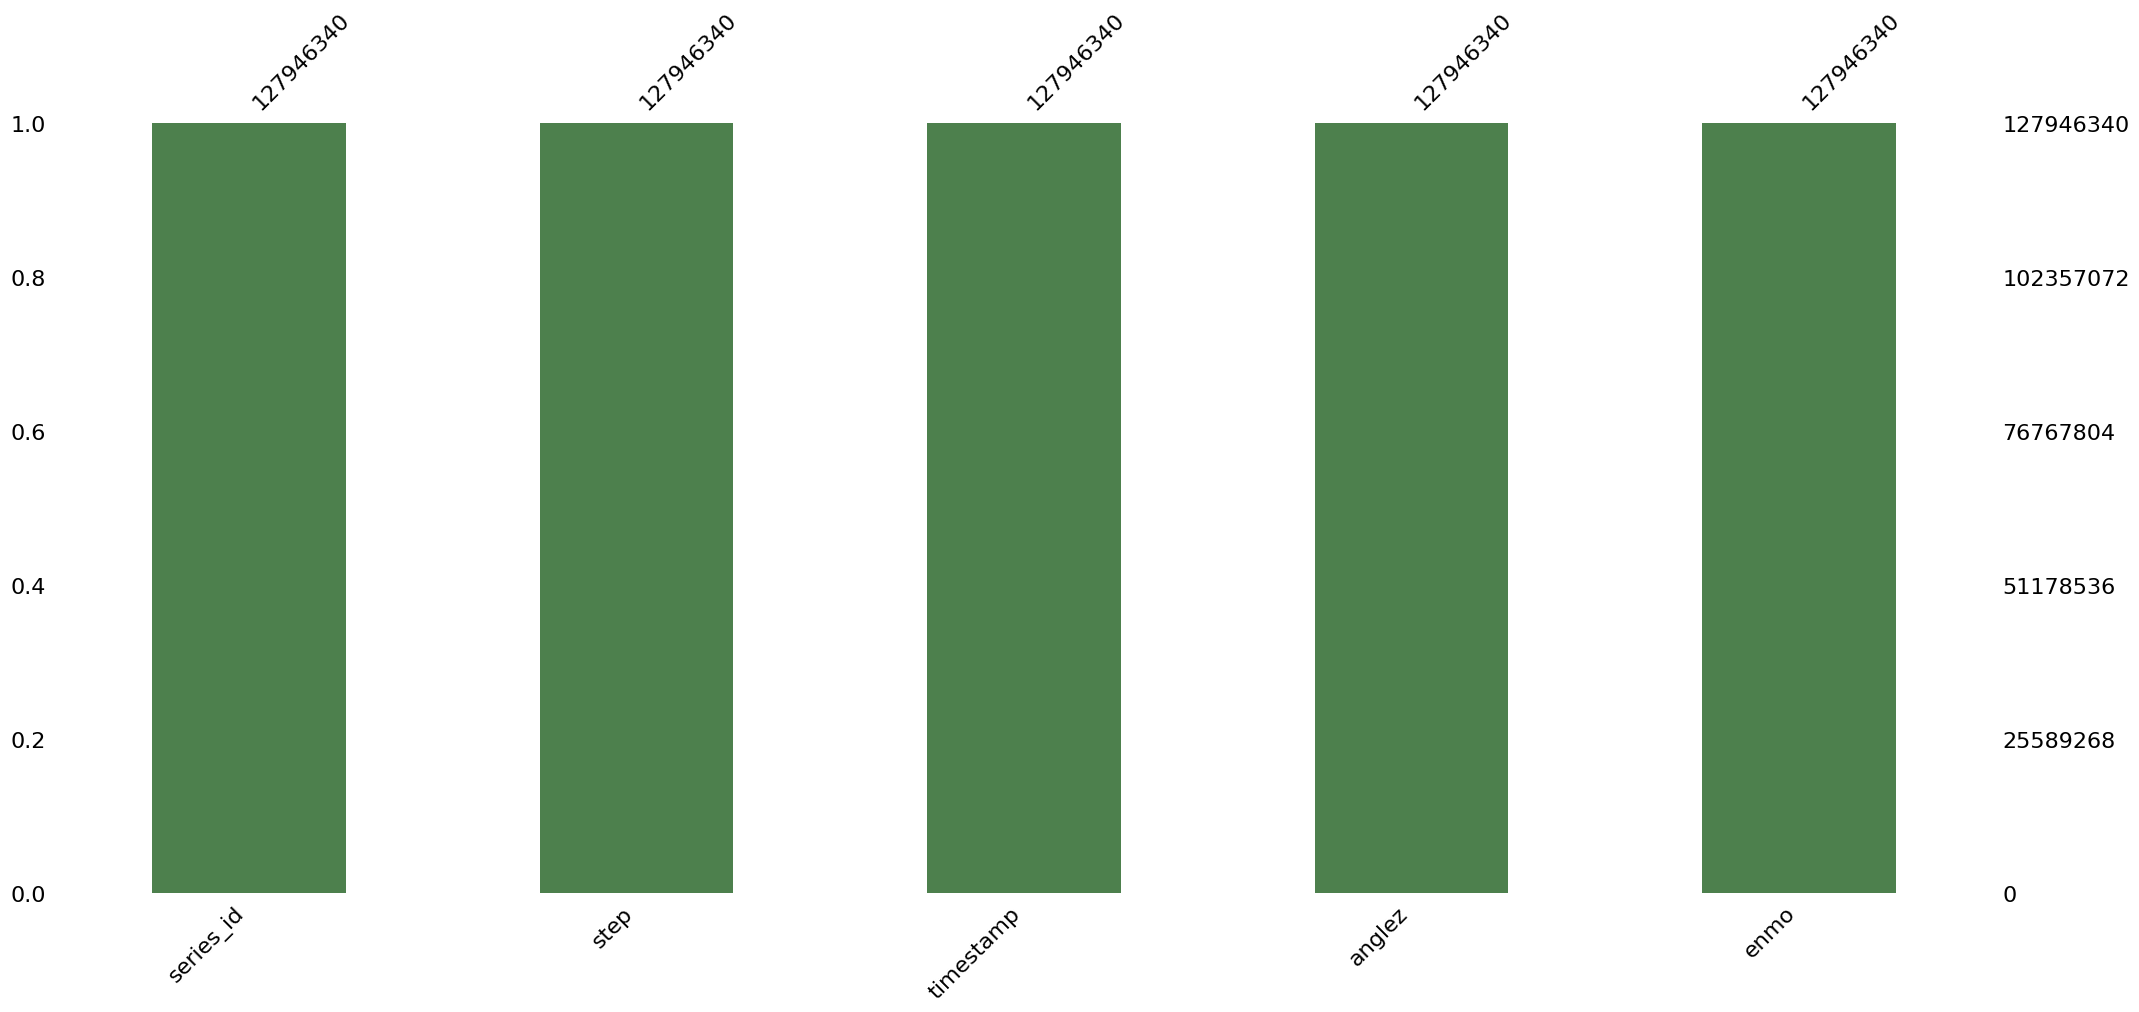

In [34]:
msno.bar(train_series, color=(0.3,0.5,0.3))

In [35]:
msno.matrix(train_series, color=(0.3,0.5,0.3))

# anglez

In [ ]:
anglez_histo = px.histogram(train_series, x='anglez')
anglez_histo.show()

In [ ]:
anglez_histo.show()